# Tkinter

Is library for building interfaces with python.

## Installation

Surprisingly, installing the tkinter isn't easy.

It can't be installed with pip alone. On Ubuntu you will need to use the package manager for this:

```bash
apt install python-tk
```

or:

```bash
apt isntall python3-tk
```

After that, tkinter will be available in the global python environment. But for installation in local pythhon envronment you have to go to the `activate` script of the environment and add there following lines.

```bash
TK_LIBRARY=/usr/lib/python3.10/lib-tk:/usr/lib/python3.10/site-packages/PIL:/usr/lib
TKPATH=/usr/lib/python3.10/lib-tk:/usr/lib/python3.10/site-packages/PIL:/usr/lib 
TCL_LIBRARY=/usr/lib 
export TCL_LIBRARY TK_LIBRARY TKPATH
```

**Note** that you have ot use your python version instead of `python3.10`.

## Examples displaying

Obviously, pages associated with tkinter will contain a ton of screenshots, so it would be great to have an opportunity to build them automatically.

The following code snippet demonstrates how to save a module that captures screenshots of a specified tkinter window.

In [1]:
%%writefile tkinter_files/screenshot.py
import tkinter as tk
import pyscreenshot as ImageGrab

def take_screenshot(root:tk.Tk):
    '''
    Taking screeshot of the given
    tkinter application. And displays
    it using jupyter funciton `display`.

    Parameters
    ----------
    root:tk.Tk
        tkinter application instalce;
    '''
    root.update()
    
    x = root.winfo_rootx()
    y = root.winfo_rooty()
    w = x + root.winfo_width()
    h = y + root.winfo_height()
    
    screenshot = ImageGrab.grab(bbox=(x, y, w, h))
    
    root.destroy()
    display(screenshot)

Overwriting tkinter_files/screenshot.py


Here is an example of how this module can be utilized, allowing you to display the results of your tkinter programs without leaving the Jupyter Notebook environment.

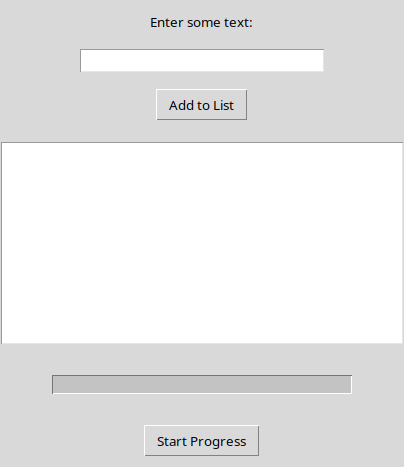

In [2]:
import tkinter as tk
from tkinter import ttk
from tkinter import messagebox
from tkinter_files.screenshot import take_screenshot

class SimpleApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Simple Tkinter Interface")

        # Label
        self.label = tk.Label(
            root, 
            text="Enter some text:"
        )
        self.label.pack(pady=10)

        # Entry
        self.entry = tk.Entry(root, width=30)
        self.entry.pack(pady=5)

        # Button
        self.button = tk.Button(
            root, text="Add to List", 
            command=self.add_to_list
        )
        self.button.pack(pady=10)

        # Listbox
        self.listbox = tk.Listbox(root, width=50, height=10)
        self.listbox.pack(pady=10)

        # Progress Bar
        self.progress = ttk.Progressbar(
            root, orient="horizontal", 
            length=300, mode="determinate"
        )
        self.progress.pack(pady=20)

        # Start Progress Bar Button
        self.progress_button = tk.Button(
            root, text="Start Progress", 
            command=self.start_progress
        )
        self.progress_button.pack(pady=10)

    def add_to_list(self):
        text = self.entry.get()
        if text:
            self.listbox.insert(tk.END, text)
            self.entry.delete(0, tk.END)
        else:
            messagebox.showwarning("Warning", "Please enter some text.")

    def start_progress(self):
        self.progress["value"] = 0
        self.progress["maximum"] = 100
        self.update_progress()

    def update_progress(self):
        if self.progress["value"] < 100:
            self.progress["value"] += 10
            self.root.after(500, self.update_progress)
        else:
            messagebox.showinfo("Info", "Progress complete!")

# Create the main application window
root = tk.Tk()
app = SimpleApp(root)
root.after(200, take_screenshot, root)
root.mainloop()

## Widgets

Is eleements of the interface in tkinter. Check [widgets overview page](tkinter/widgets_overview.ipynb) for details.

Or check official documentation:

- [Tk themed widgets](https://docs.python.org/3/library/tkinter.ttk.html#module-tkinter.ttk).

The following example creates a few random elements one by one in a random order.

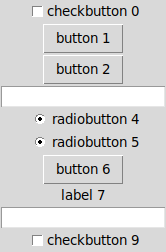

In [13]:
from random import randint 
import tkinter as tk
from tkinter_files.screenshot import take_screenshot

root = tk.Tk()

options = {
    "button" : tk.Button,
    "label" : tk.Label,
    "checkbutton" : tk.Checkbutton,
    "radiobutton" : tk.Radiobutton,
    "entry" : tk.Entry
}

for i in range(10):
    option = list(options.keys())[randint(0, len(options)-1)]
    options[option](root, text=f"{option} {i}").pack()

root.after(200, take_screenshot, root)
root.mainloop()

## Layout

In Tkinter, layout refers to the arrangement and positioning of widgets within a window or a container. Tkinter provides three built-in geometry managers that help in controlling the layout of widgets: pack, grid, and place. Each geometry manager offers different methods for organizing widgets based on specific requirements.

### Pack

In Tkinter, the `pack()` method is a geometry manager provided by the Frame and Tk (root) widgets. It is used to organize and position widgets within a container using a packing algorithm. The `pack()` method arranges widgets in a one-dimensional manner, either horizontally or vertically, filling the available space.

Read more in [specific page](tkinter/pack.ipynb).

The following example shows some buttons added to the root widow using the `pack(site=tk.LEFT)` method.

In [6]:
import tkinter as tk
from tkinter_files.screenshot import take_screenshot

root = tk.Tk()

for i in range(10):
    tk.Button(text=f"button{i}").pack(side=tk.LEFT)

root.after(200, take_screenshot, root)
root.mainloop()

## Style

There are some options in tkinter that allows to configure appearance of the objects.

The following example demonstrates various configurations of random background colors and font styles.

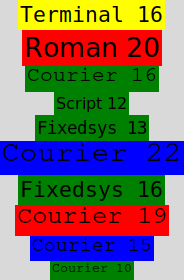

In [14]:
import numpy as np
import tkinter as tk
from tkinter_files.screenshot import take_screenshot

fonts = [
    'System',
    'Terminal',
    'Fixedsys',
    'Modern',
    'Roman',
    'Script',
    'Courier'
]
sizes = [i for i in range(10,25)]
colors = [
    'yellow',
    'red',
    'green',
    'blue'
]

root = tk.Tk()
for i in range(10):
    font=f"{np.random.choice(fonts)} {np.random.choice(sizes)}"
    tk.Label(
        master=root, 
        text=font, 
        font=font, 
        bg=np.random.choice(colors)
    ).pack()

root.after(200, take_screenshot, root)
root.mainloop()

## Binds

Here we consider a mechanism that allows actions on user interfaces to bind functions. 

We need to define a function that takes an argument and pass this function to the bind method of the object whose action the function will call. The function is called with `tkinter.Event` passed as a parameter. Through that object, you can access details of the event that triggered the function.

The following example uses button and prints the type of parameter passed, as it was clicked on the button it also prints the coordinates of the cursor.

In [10]:
import tkinter as tk

root = tk.Tk()

def button_click(event):
    print(type(event))
    print(f"x={event.x}, y={event.y}")

button = tk.Button(root, text="Click Me")
button.bind("<Button-1>", button_click)
button.pack(padx=6, pady=6)

root.mainloop()

<class 'tkinter.Event'>
x=50, y=22
<class 'tkinter.Event'>
x=11, y=16
<class 'tkinter.Event'>
x=43, y=16


### Common binds

This is a list of popular bindings with descriptions.

| Event          | Description                                                                 |
|----------------|-----------------------------------------------------------------------------|
| `<Button-1>`   | Left mouse button pressed.                                                  |
| `<Button-2>`   | Middle mouse button pressed.                                                |
| `<Button-3>`   | Right mouse button pressed.                                                 |
| `<Double-Button-1>` | Double-click with the left mouse button.                                |
| `<B1-Motion>`  | Mouse is moved with the left button held down.                              |
| `<Enter>`      | Mouse enters the widget area.                                               |
| `<Leave>`      | Mouse leaves the widget area.                                               |
| `<FocusIn>`    | Widget gains keyboard focus.                                                |
| `<FocusOut>`   | Widget loses keyboard focus.                                                |
| `<Key>`        | Any key is pressed.                                                         |
| `<KeyPress>`   | A key is pressed (same as `<Key>`).                                         |
| `<KeyRelease>` | A key is released.                                                          |
| `<Configure>`  | The widget is resized or moved.                                             |
| `<Destroy>`    | The widget is destroyed.                                                    |
| `<Motion>`     | Mouse is moved.                                                             |
| `<MouseWheel>` | Mouse wheel is moved (usually scroll event).                                |
| `<Return>`     | The Enter key is pressed.                                                   |
| `<Escape>`     | The Escape key is pressed.                                                  |
| `<Control-Char>` | Control key combination (e.g., `<Control-c>` for Ctrl+C).                  |
| `<Alt-Char>`   | Alt key combination (e.g., `<Alt-x>` for Alt+X).                            |
| `<Shift-Char>` | Shift key combination (e.g., `<Shift-X>` for Shift+X).                      |
| `<Fi>`         | Function key Fi pressed. Where i is a number from 1 to 12.  

### Multiple binds

If you bind more than one function to the same event - only the last bound function will be executed.

The following example shows this - there are two functions linked to the click of the button. The first function prints "111", the second "222".

In [16]:
import tkinter as tk

root = tk.Tk()

def button_click_first(event):
    print("Function one")


button = tk.Button(root, text="Click Me")
button.bind("<Button-1>", lambda event: print("111"))
button.bind("<Button-1>", lambda event: print("222"))
button.pack(padx=6, pady=6)

root.mainloop()

222
222
222
222


After a few clicks on the buttons, all we got were "222" messages.

## Variables

Variables in tkinter is a special implementation of the basic Python types, but it allows to bind them to events on the gui.

The following cell shows a really simple example where there is a `tkinter.StringVar` bound to the `Entry` and `Label`. It makes them always have the same content, so anytime you've changed the entry you'll have to update the label.

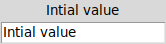

In [12]:
import tkinter as tk
from tkinter_files.screenshot import take_screenshot

root = tk.Tk()

my_variable = tk.StringVar(value="Intial value")

tk.Label(textvariable=my_variable).pack()
tk.Entry(textvariable=my_variable).pack()

root.after(200, take_screenshot, root)
root.mainloop()

### Add operation

You can set up operations to be associated with variables using the `trace_add` method.

The following example shows the process of adding trace to the variable. The function prints all its input arguments each time it is called. Then by calling `my_var.set` we cause the trace to be executed.

In [24]:
import tkinter as tk
root = tk.Tk()

my_var = tk.StringVar()

def my_callback(var, index, mode):
    print (f"Traced variable {my_var.get()}")
    print("var:", var)
    print("index:", index)
    print("mode:", mode)

# Registering the observer
my_var.trace_add('write', my_callback)

my_var.set("hello")

root.after(1, lambda: root.destroy())
root.mainloop()

Traced variable hello
var: PY_VAR19
index: 
mode: write
